# $K_{d}$ Analysis of ELISA Binding Data
#### **Joe Laforet, Jr. and Pranam Chatterjee**
#### BME305L - Duke University - Biomedical Engineering

### Introduction:
 In order to determine the $K_{d}$ of your designed proteins, you will be performing an ELISA assay, where you will vary the concentration of your designed binder and measure the OD450 absorbance of your sample. Based upon a 4-parameter logistic regression, you will then map your OD values to the requisite input binder concentrations, and then obtain a $K_{d}$ value.

In [ ]:
from scipy.optimize import curve_fit #This will do the actual curve fitting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

### Input Data
Use the provided, template CSV file to input your OD450 data as triplicates for input  concentrations of your binder.

In [ ]:
data_file = glob.glob("*.csv")[0]
data_file

'binder3elisa.csv'

In [ ]:
df = pd.read_csv(data_file)
# Create a new column for the mean
df['mean'] = df[['r1','r2']].mean(axis=1)

# Create a new column for the standard deviation
df['std_dev'] = df[['r1','r2']].std(axis=1)
df

,Concentration (uM),r1,r2,mean,std_dev
0,0.001,0.020,0.027,0.0235,0.004950
1,0.100,0.026,0.022,0.0240,0.002828
2,10.000,0.030,0.028,0.0290,0.001414
3,1000.000,0.030,0.038,0.0340,0.005657
4,10000.000,0.034,0.034,0.0340,0.000000


We will then calculate the mean OD450 and standard deviation for each measured concentration.

In [ ]:
# Average OD450 for each binder given concentration
y = df['mean']
y_err = df['std_dev']
# Concentrations of binder
x = df['Concentration (uM)'].tolist()

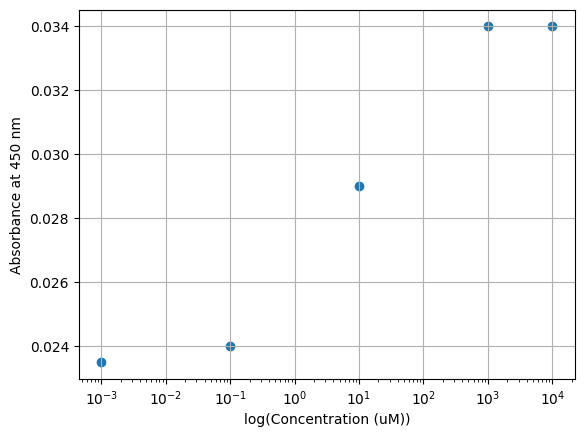

In [ ]:
#Raw Data Plot
plt.scatter(x,y)
plt.xlabel('log(Concentration (uM))')
plt.xscale('log')
plt.ylabel('Absorbance at 450 nm')
plt.grid(True)

In [ ]:
# Set up our continuous array of x values for plotting our model
x_min = min(x)
x_max = max(x)
step = 0.01
x_new = np.arange(x_min, x_max, step)

## We will use a 4 parameter logistic regression model to fit our data.

* A: The minimum value of OD (at lowest concentration)
* B: The slope of the curve at the point of C (Hill's slope)
* C: The inflection point, half-way between A and D
* D: The maximum value of OD450 (at infinite concentration)

In [ ]:
def log4pl(x, A, B, C, D):
    return(((A-D)/(1.0+((x/C)**B))) + D)

In [ ]:
params, _ = curve_fit(log4pl, x, y) #curve fit
A,B,C,D = params[0], params[1], params[2], params[3] #get the parameters
print("4PL parameters: A = " + str(round(A,4)) + ", B = " + str(round(B,4)) + ", C = " + str(round(C,4)) + ", D = " + str(round(D,4))) #print the paramters

4PL parameters: A = 0.0236, B = 0.7545, C = 9.2692, D = 0.0342


In [ ]:
# Evaluate the model at the input concentration values
yfit1_new = ((A-D)/(1.0+((x_new/C)**B))) + D

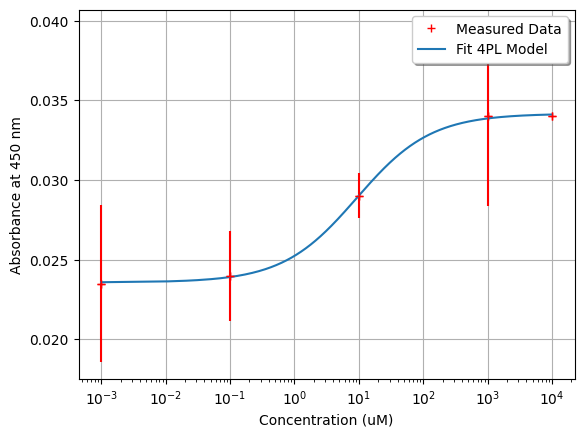

In [ ]:
# Plot the 4PL Model with the Measured Data

plt.errorbar(x, y, yerr=y_err, fmt='r+')
plt.plot(x, y, 'r+', label="Measured Data")
plt.plot(x_new, yfit1_new, label="Fit 4PL Model")
plt.xlabel('Concentration (uM)')
plt.ylabel('Absorbance at 450 nm')
plt.xscale("log")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Here, you can measure how good your model fits your data. Values within the range 70% - 130% of the original value are generally okay for ELISA measurements.

In [ ]:
yfit1_recovery = ((A-D)/(1.0+((x/C)**B))) + D
(yfit1_recovery/y) * 100

0    100.347030
1     99.614633
2    100.079240
3     99.619025
4    100.345552
Name: mean, dtype: float64

Finally, the $K_{d}$ is the concentration at which $K_{max}$ is at 50%.

In [ ]:
half_kmax = (A+D)/2
y_half = np.abs(yfit1_new - half_kmax).argmin()
k_d = x_new[y_half]
print(f"K_d = {k_d:0.4} uM.")

K_d = 9.271 uM.


### Reference
Davis, et al. [Principles of Curve Fitting for Multiplex Sandwich Immunoassays.](https://geiselmed.dartmouth.edu/dartlab/wp-content/uploads/sites/22/2017/05/Bio-RadTechNote2861_principles_of_curve_fitting.pdf) (2023)

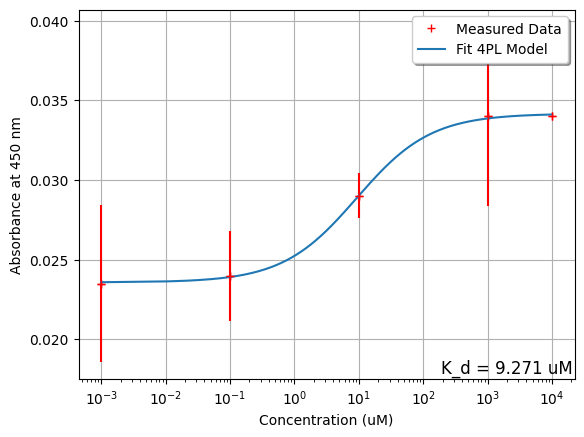

In [ ]:
# Plot the 4PL Model with the Measured Data
plt.errorbar(x, y, yerr=y_err, fmt='r+')
plt.plot(x, y, 'r+', label="Measured Data")
plt.plot(x_new, yfit1_new, label="Fit 4PL Model")
plt.xlabel('Concentration (uM)')
plt.ylabel('Absorbance at 450 nm')
plt.xscale("log")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)

# Display the k_d value in the lower right corner
kd_x_position = max(x) * 2.1 # 70% along the x-axis
kd_y_position = min(y) * 0.76  # Slightly above the minimum y value
plt.text(kd_x_position, kd_y_position, f"K_d = {k_d:0.4} uM", fontsize=12, ha='right')

plt.show()